# Load predictor

In [1]:
%matplotlib inline
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matplotlib.use("Agg")

/home/del/anaconda3/envs/allennmt/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/del/anaconda3/envs/allennmt/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/del/anaconda3/envs/allennmt/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/del/anaconda3/envs/allennmt/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/del/anaconda3/envs/allennmt/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/del/anaconda3/envs/allennmt/lib/pyth

In [3]:
os.getcwd()

'/home/del/research/span_ae/notebooks'

In [4]:
os.chdir('/home/del/research/span_ae')

In [5]:
import span_ae
from allennlp.models.archival import load_archive
from allennlp.service.predictors import Predictor

/home/del/anaconda3/envs/allennmt/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
archive = load_archive("models/baseline/model.tar.gz")

In [7]:
predictor = Predictor.from_archive(archive, 'span_ae')

## Func

In [14]:
def predict_plot(sentence):
    # predict
    result = predictor.predict_json(sentence)
    attention_matrix = result['attention_matrix']
    predicted_tokens = result['predicted_tokens']
    survived_span_ids = result['top_spans']
    input_sentence = ['BOS'] + sentence['src'].split() + ['EOS']
    predicted_tokens = predicted_tokens + ['EOS']
    survived_spans = []
    for span_id in survived_span_ids:
        ind_from = span_id[0]
        ind_to = span_id[1] + 1
        survived_spans.append(" ".join(input_sentence[ind_from:ind_to]))
    attention_matrix_local = attention_matrix[0:len(predicted_tokens)]
    att_matrix_np = np.array([np.array(xi) for xi in attention_matrix_local])
    
    
    #print
    print('ORIGINAL :', " ".join(input_sentence))
    #print('TOP SPANs:', " \n ".join(survived_spans))
    print('PREDICTED:', " ".join(predicted_tokens))
    #print('span scores:', result['top_spans_scores'])
    print('\nAttnetion matrix:')
    
    # plot
    plt.figure(figsize=(9, 9), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(att_matrix_np.transpose(), interpolation="nearest", cmap="Greys")
    plt.xlabel("target")
    plt.ylabel("source")
    plt.gca().set_xticks([i for i in range(0, len(predicted_tokens))])
    plt.gca().set_yticks([i for i in range(0, len(survived_spans))])
    plt.gca().set_xticklabels(predicted_tokens, rotation='vertical')
    plt.gca().set_yticklabels(survived_spans)
    plt.tight_layout()

## Inference

ORIGINAL : BOS to school EOS
PREDICTED: to studies EOS

Attnetion matrix:


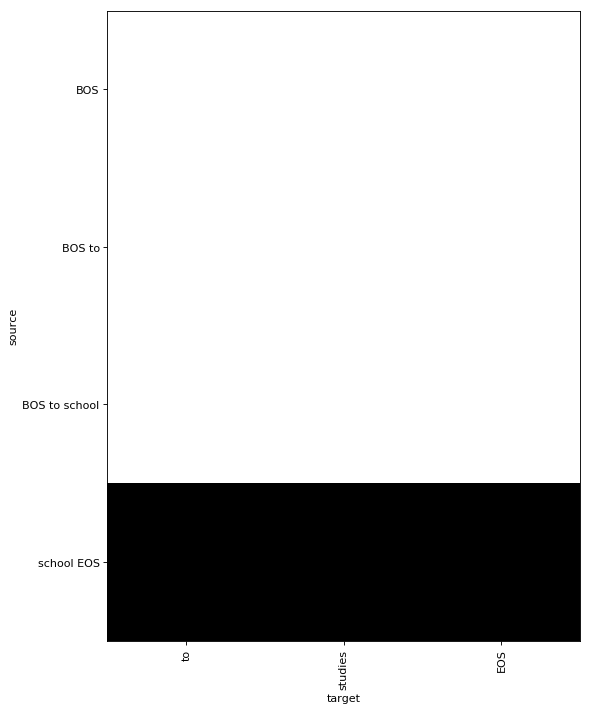

In [15]:
# change it
sentence = "to school"

# do not change it
predict_plot({'src': sentence})

ORIGINAL : BOS school EOS
PREDICTED: poverty EOS

Attnetion matrix:


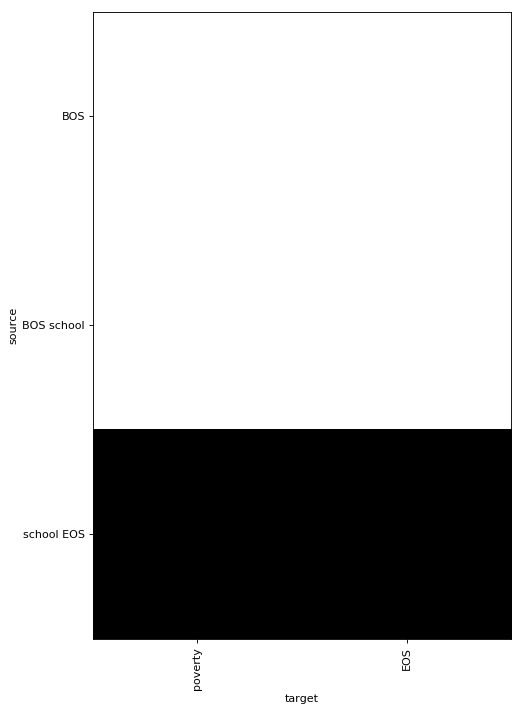

In [16]:
# change it
sentence = "school"

# do not change it
predict_plot({'src': sentence})

ORIGINAL : BOS it is spring already , but there are a lot of snow out there EOS
PREDICTED: it is already spring , but there are a lot of snow there there EOS

Attnetion matrix:


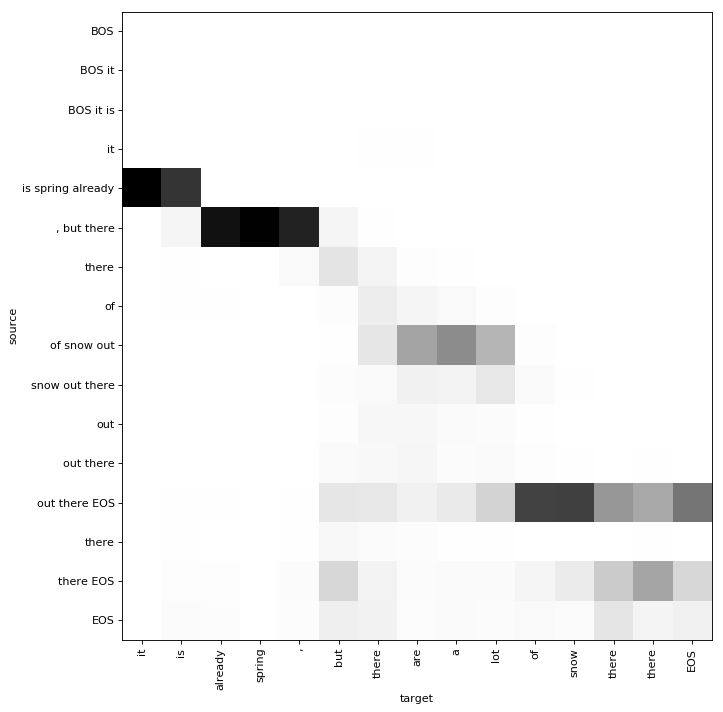

In [17]:
# change it
sentence = "it is spring already , but there are a lot of snow out there"

# do not change it
predict_plot({'src': sentence})

ORIGINAL : BOS state of the art EOS
PREDICTED: state of the EOS

Attnetion matrix:


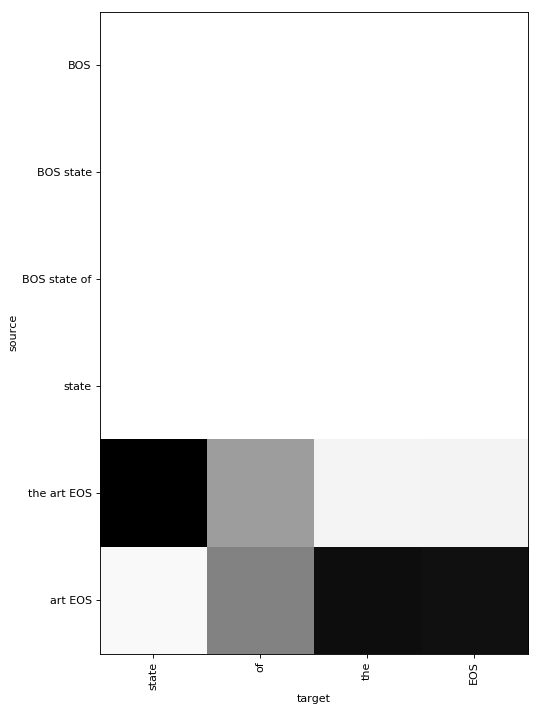

In [18]:
b

ORIGINAL : BOS let us discard our entire human knowledge EOS
PREDICTED: let us discard our entire development knowledge EOS

Attnetion matrix:


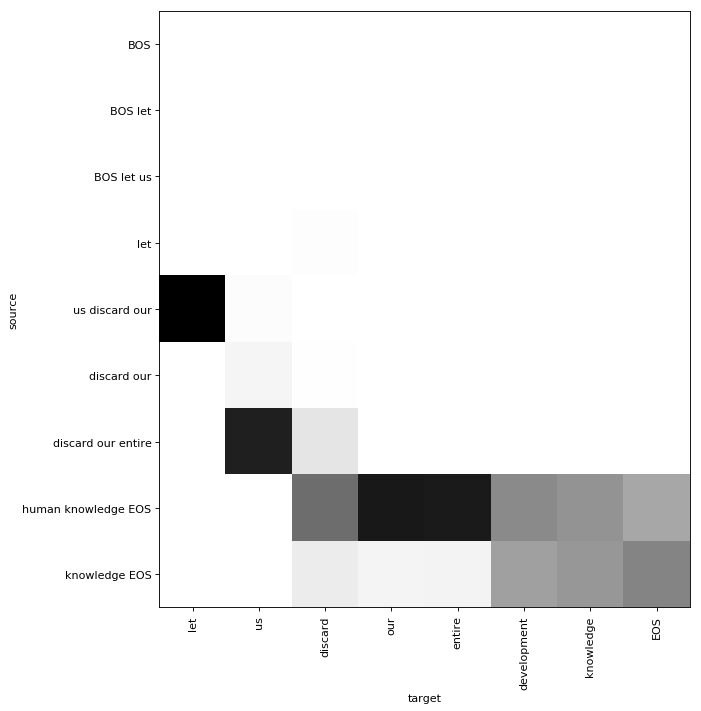

In [28]:
# change it
sentence = "let us discard our entire human knowledge"

# do not change it
predict_plot({'src': sentence})